In [21]:
!pip3 install cv2

  ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential, load_model
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.utils import to_categorical
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score
%matplotlib inline

In [5]:
filename = './fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def getData(filename):
    Y = []
    X = []
    first = True
    for line in open(filename):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append(np.array([int(p) for p in row[1].split()]).reshape((48,48)))
            
    
    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

X, Y = getData(filename)
X = np.reshape(X, (-1,48,48,1))
num_class = len(set(Y))
Y = to_categorical(Y, num_classes=num_class)

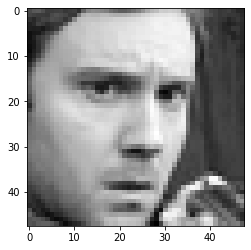

In [6]:
plt.imshow(X[0,:,:,0], cmap='gray')

In [7]:
X1 = X[0:10,:,:,:]
Y = Y[0:10,:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.1, random_state=0)

In [9]:
batch_size = 128
epochs = 60
def baseline_model():
    model = Sequential()

    model.add(Conv2D(64,(3,3), border_mode='same', input_shape=(48, 48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(5,5), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.40))
                         
    model.add(Conv2D(256,(3,3), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.40))
                      
    model.add(Conv2D(512,(5,5), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  
                                   
    model.add(Flatten())
                      
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
                      
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25)) 
    

    model.add(Dense(num_class, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[categorical_accuracy])
    return model

/Users/raj/Downloads/majorProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(48, 48, 1..., padding="same")`
  
/Users/raj/Downloads/majorProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), padding="same")`
  if sys.path[0] == '':
/Users/raj/Downloads/majorProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/Users/raj/Downloads/majorProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (5, 5), padding="same")`


Instructions for updating:
Use tf.cast instead.
Train on 8 samples, validate on 1 samples
Epoch 1/60
 - 3s - loss: 0.6799 - categorical_accuracy: 0.0000e+00 - val_loss: 0.5105 - val_categorical_accuracy: 1.0000
Epoch 2/60
 - 1s - loss: 0.6302 - categorical_accuracy: 0.5000 - val_loss: 0.5078 - val_categorical_accuracy: 0.0000e+00
Epoch 3/60
 - 1s - loss: 0.5372 - categorical_accuracy: 0.2500 - val_loss: 0.5151 - val_categorical_accuracy: 0.0000e+00
Epoch 4/60
 - 1s - loss: 0.5102 - categorical_accuracy: 0.1250 - val_loss: 0.5244 - val_categorical_accuracy: 0.0000e+00
Epoch 5/60
 - 1s - loss: 0.3510 - categorical_accuracy: 0.7500 - val_loss: 0.5056 - val_categorical_accuracy: 0.0000e+00
Epoch 6/60
 - 1s - loss: 0.3415 - categorical_accuracy: 0.7500 - val_loss: 0.5075 - val_categorical_accuracy: 0.0000e+00
Epoch 7/60
 - 1s - loss: 0.2491 - categorical_accuracy: 1.0000 - val_loss: 0.5273 - val_categorical_accuracy: 0.0000e+00
Epoch 8/60
 - 1s - loss: 0.2901 - categorical_accuracy: 0.8750 

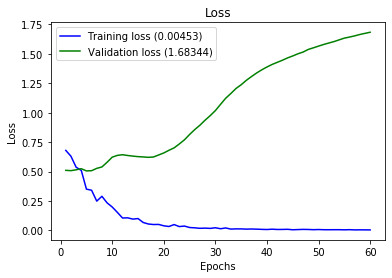

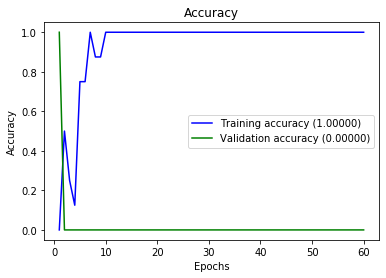

/Users/raj/Downloads/majorProject/venv/lib/python3.7/site-packages/keras/engine/sequential.py:110: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


In [10]:
model = baseline_model()

m1=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,validation_split=0.1111)

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(m1)
model.model.save('cnn.h5')

In [11]:
model = load_model('cnn.h5')
pred = model.predict(X_test)
print(model.summary())

y_pred, y_test_actual = [], []
y_pred = [np.argmax(p) for p in pred]    
y_test_actual = [np.argmax(p) for p in y_test]

print(" Accuracy on Test set : " , accuracy_score(y_test_actual, y_pred))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 128)       512       
__________

In [12]:
pred_emotion=[]
for i in range(len(y_pred)):
    if y_pred[i]==0:
        pred_emotion.append("Anger")
    elif y_pred[i]==1:
        pred_emotion.append("Disgust")
    elif y_pred[i]==2:
        pred_emotion.append("Fear")
    elif y_pred[i]==3:
        pred_emotion.append("Happy")
    elif y_pred[i]==4:
        pred_emotion.append("Sad")
    elif y_pred[i]==5:
        pred_emotion.append("Surprise")
    elif y_pred[i]==6:
        pred_emotion.append("Neutral")
    
print(pred_emotion)

['Happy']


In [13]:
act_emotion=[]
for i in range(len(y_test_actual)):
    if y_test_actual[i]==0:
        act_emotion.append("Anger")
    elif y_test_actual[i]==1:
        act_emotion.append("Diusgust")
    elif y_test_actual[i]==2:
        act_emotion.append("Fear")
    elif y_test_actual[i]==3:
        act_emotion.append("Happy")
    elif y_test_actual[i]==4:
        act_emotion.append("Sad")
    elif y_test_actual[i]==5:
        act_emotion.append("Surprise")
    elif y_test_actual[i]==6:
        act_emotion.append("Neutral")
    
print(act_emotion)

['Fear']


In [16]:
import pandas

test_image_number=[]
for i in range(len(act_emotion)):
    print("For test image:",i+1)
    print("The actual emotion as in the dataset is:",act_emotion[i])
    print("The emotion predicted by our algorithm is:",pred_emotion[i])
    test_image_number.append(i+1)
    
df = pandas.DataFrame(columns=["Test image Number","Actual Emotion","Predicted Emotion"], data=list(zip(test_image_number,act_emotion,pred_emotion))) 


For test image: 1
The actual emotion as in the dataset is: Fear
The emotion predicted by our algorithm is: Happy


In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[0 1]
 [0 0]]
Normalized confusion matrix
[[ 0.  1.]
 [nan nan]]


/Users/raj/Downloads/majorProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


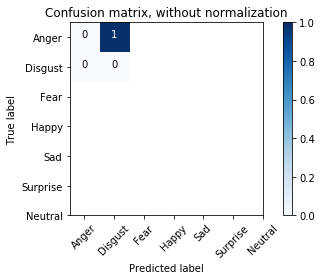

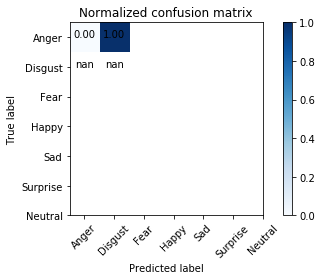

In [18]:
cnf_matrix = confusion_matrix(y_test_actual, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_map,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label_map, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [19]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

font = cv2.FONT_HERSHEY_SIMPLEX

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')


img = cv2.imread('./me.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray)


print('Number of faces detected:', len(faces))


for (x, y, w, h) in faces:
    fc = gray[y:y+h, x:x+w]

    roi = cv2.resize(fc, (48, 48))
    pred = model.predict(roi[np.newaxis, :, :, np.newaxis])
    
    for i in range(len(pred[0])):
        if pred[0][i]==1:
            index=i
        if index==0:
            out="Anger"
        elif index==1:
            out="Disgust"
        elif index==2:
            out="Fear"
        elif index==3:
            out="Happy"
        elif index==4:
            out="Sad"
        elif index==5:
            out="Surprise"
        elif index==6:
            out="Neutral"
    
    cv2.putText(img, out, (x, y), font, 1, (255, 255, 0), 2)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)


cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("The emotion predicted is:",out)
print("Maybe the emotion was neutral!!! Wrong predictions")

plt.imshow(cv_rgb)
plt.show()

ModuleNotFoundError: No module named 'cv2'

In [20]:
model.load_weights('./cnn.h5')

cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Anger", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined